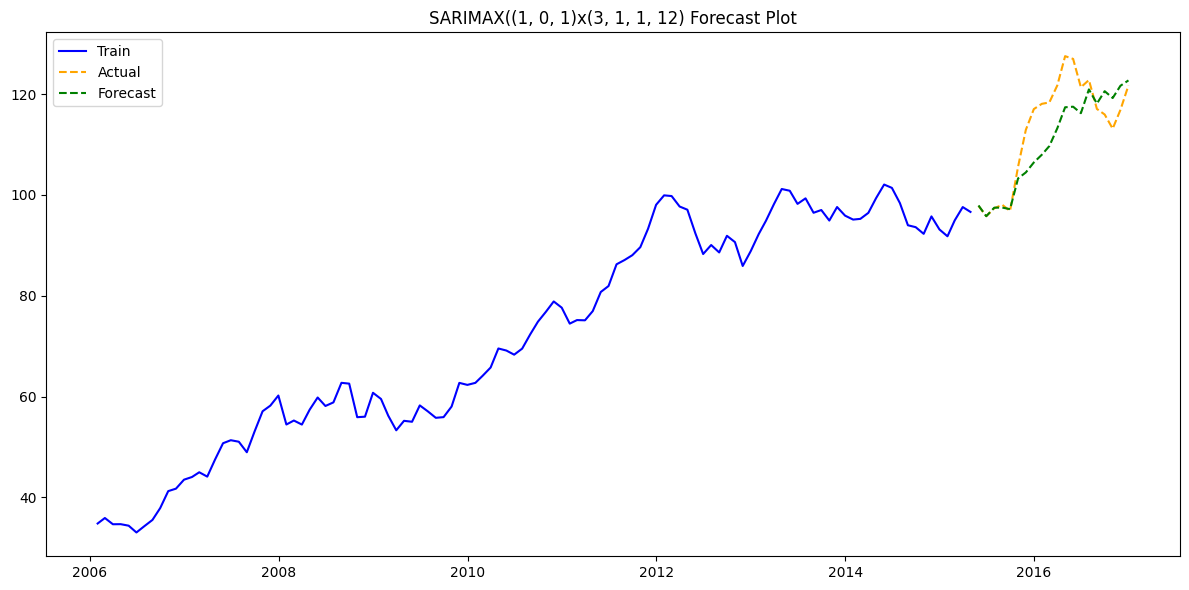

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../ML471_S4_Datafile_Practice.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

train_size = int(len(df) * 0.85)
train = df[:train_size]
test = df[train_size:]

exog_cols = ['Close_diff', 'SMA_10', 'SMA_30', 'SES']
train_exog = train[exog_cols].bfill()
test_exog = test[exog_cols].bfill()

model = SARIMAX(train['Close'], 
                exog=train_exog,
                order=(1, 0, 1),
                seasonal_order=(3, 1, 1, 12))
fitted_model = model.fit(disp=False)

forecast = fitted_model.forecast(steps=len(test), exog=test_exog)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Actual', color='orange', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')
plt.title('SARIMAX((1, 0, 1)x(3, 1, 1, 12) Forecast Plot')
plt.legend()
plt.tight_layout()
plt.show()